In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<h2>Examine the data provided</h2>

In [3]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Daly, Mr. Eugene Patrick",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
train_df.iloc[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3>Variables and their definitions</h3>
<ul>
    <li>Survived: Survived = 1, Died = 0</li>
    <li>Pclass: Passenger's Class</li>
    <li>Name: Passenger's Name and Title</li>
    <li>Sex: Passenger's sex</li>
    <li>Age: Passengere's age</li>
    <li>SibSp: Number of siblings/spouses aboard</li>
    <li>Parch: Number of parents/children aborad</li>
    <li>Ticket: Ticket Number</li>
    <li>Fare: Price of Ticket purchased</li>
    <li>Cabin: Cabin passenger purchased</li>
    <li>Embarked: Port passenger boarded the Titanic</li>
</ul>

<h3>Observations of data</h3>
    <ul><li>Total of 891 passengers boarded</li>
    <li>38% survived</li> 
    <li>Age ranges from 0.4 to 80 and 177 passengers whose Age were not recorded</li>
    <li>210 missing Ticket Information - unique ticket numbers for each passenger, unlikely relevant to survivability</li>
    <li>Fare ranged from 0 to 512</li>
    <li>only 204 Cabin information obtained - consider how to fill or convert the data</li>
    <li>2 embarked information missing - consider how to fill the missing data</li>
    <li>SibSp and Parch are relatively similar - consider creating a new category of family size?</li>
    <li>A few features will need to be encoded for machine learning - Sex?</li>
    </ul>

<h2>Data Wrangling</h2>

1. Embarked - 2 passengers with missing information

In [5]:
# S is the most common destination, makes sense to fill the 2 passengers with the missing detail
train_df['Embarked'].fillna('S', inplace=True)

<p>2. Age</p>
<p>- 1 method would be passengers without age with the mean age of passengers, however closer inspection reveals that the age could be inferred from a passenger's title. </p>

In [6]:
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.') #extract the Salutations
train_df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

<p>Converting titles that have the same meaning:</p>
<ul><li>Mlle means 'Mademoiselle' which is the honorific used to describe someone who would be called 'Miss' in France</li>
<li>Mme means 'Madame' which is the honorific used to describe someone who would be called 'Mrs' in France</li>
<li>Ms is the short form for 'Miss'</li>
<li>Lady, Countess, Dona are female honorifics of nobility</li>
<li>Don, Sir, Jonkheer are male honorifics of nobility</li>
<li>Capt refers to the Captain of the Titanic</li>
<li>Col, Major are military positions</li>
<li>Dr are doctors</li>
<li>Rev is a Reverend</li></ul>

In [7]:
train_df['Title']=train_df['Initial'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], ['Mr','Other','Mr','Miss','Miss','Mr','Mrs','Mr','Miss','Mr','Mr','Mrs','Other'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [8]:
train_df.groupby(['Title'])['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.862530
Mrs       35.981818
Other     42.428571
Name: Age, dtype: float64

In [9]:
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Master'), 'Age']=5
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Miss'), 'Age']=22
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Mr'), 'Age']=32
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Mrs'), 'Age']=36
train_df.loc[(train_df['Age'].isnull()) & (train_df['Title']=='Other'), 'Age']=42

In [10]:
# to ensure no missing values
train_df['Age'].isnull().sum()

0

<p>- As the ages vary from 0.4 - 80, to group the ages together </p>

In [11]:
bins = list(range(0,100,10))
train_df['age_group'] = pd.cut(train_df['Age'], bins)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Title,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,"(30, 40]"


<p>3. Cabin</p>
<p>77% of the data is missing - decided to drop it in view of this</p?

In [12]:
train_df.drop('Cabin', axis=1, inplace=True)

4. Form a new category - Family Size

In [13]:
train_df['Family_Size']=train_df['SibSp'] + train_df['Parch']
train_df.drop('SibSp', inplace=True, axis=1)
train_df.drop('Parch', inplace=True, axis=1)

5. Drop columns unlikely to contribute to survival probability
<ul><li>Ticket uniquely referenced to each passenger - decided to drop as little information may be obtained from it</li>
    <li>PassengerId - does not contribute to survival probability</li>
 

In [14]:
train_df.drop('Ticket', inplace=True, axis=1)
train_df.drop('PassengerId', inplace=True, axis=1)

In [15]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Initial,Title,age_group,Family_Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Mr,Mr,"(20, 30]",1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Mrs,Mrs,"(30, 40]",1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Miss,Miss,"(20, 30]",0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Mrs,Mrs,"(30, 40]",1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Mr,Mr,"(30, 40]",0


<h2>Exploratory data analysis: Examine relationship of variables and survival</h2>

1. Sex

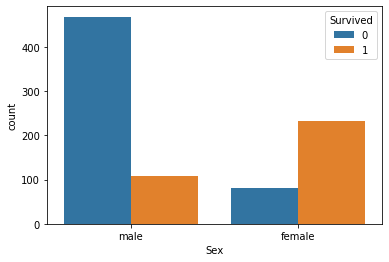

In [16]:
sns.countplot(data=train_df, x='Sex', hue='Survived')

2. Age vs Sex

Text(0.5, 1.0, 'Male')

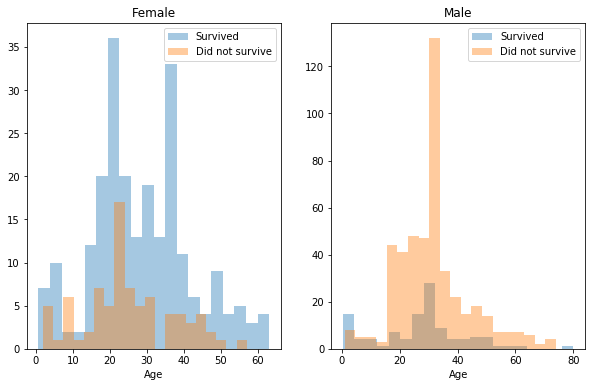

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
women_df = train_df[train_df['Sex']=='female']
men_df = train_df[train_df['Sex']=='male']
ax=sns.distplot(women_df[women_df['Survived']==1].Age.dropna(), label='Survived', bins=20, kde=False, ax=axes[0])
ax=sns.distplot(women_df[women_df['Survived']==0].Age.dropna(),label='Did not survive', bins=20, kde=False, ax=axes[0])
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men_df[men_df['Survived']==1].Age.dropna(), label='Survived', bins=20, kde=False, ax=axes[1])
ax=sns.distplot(men_df[men_df['Survived']==0].Age.dropna(),label='Did not survive', bins=20, kde=False, ax=axes[1])
ax.legend()
ax.set_title('Male')

3. Pclass

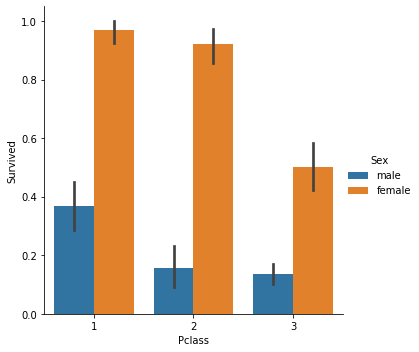

In [18]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_df, kind='bar')
# sns.barplot()

In [19]:
train_df.loc[train_df['Family_Size'] > 0, 'not_alone'] = 0
train_df.loc[train_df['Family_Size'] ==0, 'not_alone'] = 1
train_df['not_alone'] = train_df['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

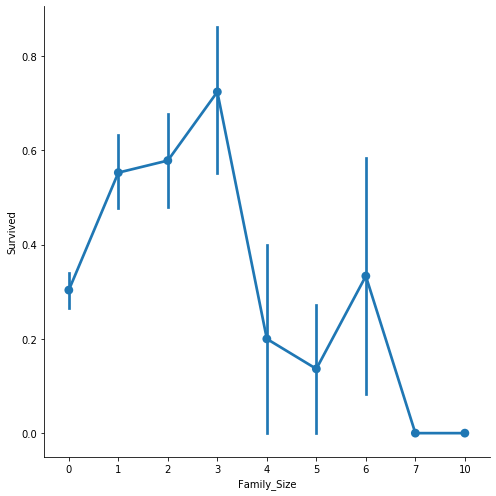

In [20]:
# fig , axes = plt.subplots(figsize=(20,8))
axes = sns.catplot('Family_Size','Survived', kind='point', data=train_df, height = 7, )

<h2>Convert to One-hot Encoded Variables</h2>
<p>One-hot encoding employed as there is no hierachy to the variables. E.g. Larger Family size does not have higher priority than smaller family size, being older does not rank higher than a younger person</p>


In [21]:
train_df[['female','male']]=pd.get_dummies(train_df["Sex"])

In [22]:
train_df[['C','S','Q']] = pd.get_dummies(train_df['Embarked'])

In [23]:
train_df[['Mr', 'Miss','Mrs','Master','Other']]=pd.get_dummies(train_df[['Title']])

In [24]:
train_df[["age10","age20","age30","age40","age50","age60","age70","age80","age90"]]=pd.get_dummies(train_df["age_group"])
train_df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Initial,Title,age_group,...,Other,age10,age20,age30,age40,age50,age60,age70,age80,age90
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Mr,Mr,"(20, 30]",...,0,0,0,1,0,0,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Mrs,Mrs,"(30, 40]",...,0,0,0,0,1,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Miss,Miss,"(20, 30]",...,0,0,0,1,0,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Mrs,Mrs,"(30, 40]",...,0,0,0,0,1,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Mr,Mr,"(30, 40]",...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,Rev,Other,"(20, 30]",...,1,0,0,1,0,0,0,0,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,Miss,Miss,"(10, 20]",...,0,0,1,0,0,0,0,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,23.4500,S,Miss,Miss,"(20, 30]",...,0,0,0,1,0,0,0,0,0,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,Mr,Mr,"(20, 30]",...,0,0,0,1,0,0,0,0,0,0


In [25]:
train_df.drop(["Sex"], axis=1, inplace=True)
train_df.drop(["Embarked"], axis=1, inplace=True)
train_df.drop(["Title"], axis=1, inplace=True)
train_df.drop(["Age"], axis=1, inplace=True)
train_df.drop(['Fare'], axis=1, inplace=True)
train_df.drop(['Name'], axis=1, inplace=True)
train_df.drop(['Initial'], axis=1, inplace=True)
train_df.drop(['age_group'], axis=1, inplace=True)

<h2>Predicting survivability</h2>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [27]:
test_df['Embarked'].fillna('S', inplace=True)
for i in test_df:
     test_df['Initial']=test_df.Name.str.extract('([A-Za-z]+)\.')
test_df['Title']= test_df['Initial'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], ['Mr','Other','Mr','Miss','Miss','Mr','Mrs','Mr','Miss','Mr','Mr','Mrs','Other','Mrs'])

test_df.loc[(test_df['Age'].isnull()) & (test_df['Title']=='Master'), 'Age']=5
test_df.loc[(test_df['Age'].isnull()) & (test_df['Title']=='Miss'), 'Age']=22
test_df.loc[(test_df['Age'].isnull()) & (test_df['Title']=='Mr'), 'Age']=32
test_df.loc[(test_df['Age'].isnull()) & (test_df['Title']=='Mrs'), 'Age']=36
test_df.loc[(test_df['Age'].isnull()) & (test_df['Title']=='Other'), 'Age']=42
bins = list(range(0,100,10))
test_df['age_group'] = pd.cut(test_df['Age'], bins)
test_df.head()
test_df.drop('Cabin', axis=1, inplace=True)
test_df['Family_Size']=test_df['SibSp'] + test_df['Parch']
test_df.drop('SibSp', inplace=True, axis=1)
test_df.drop('Parch', inplace=True, axis=1)
test_df.drop('Ticket', inplace=True, axis=1)

In [28]:
test_df.loc[test_df['Family_Size'] > 0, 'not_alone'] = 0
test_df.loc[test_df['Family_Size'] ==0, 'not_alone'] = 1
test_df['not_alone'] = test_df['not_alone'].astype(int)
test_df['not_alone'].value_counts()

1    253
0    165
Name: not_alone, dtype: int64

In [29]:
test_df[['female','male']]=pd.get_dummies(test_df["Sex"])
test_df[['C','S','Q']] = pd.get_dummies(test_df['Embarked'])
test_df[['Mr', 'Miss','Mrs','Master','Other']]=pd.get_dummies(test_df['Title'])
test_df[["age10","age20","age30","age40","age50","age60","age70","age80","age90"]]=pd.get_dummies(test_df["age_group"])
test_df.drop(["Sex"], axis=1, inplace=True)
test_df.drop(["Embarked"], axis=1, inplace=True)
test_df.drop(["Title"], axis=1, inplace=True)
test_df.drop(["Age"], axis=1, inplace=True)
test_df.drop(['Fare'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)
test_df.drop(['Initial'], axis=1, inplace=True)
test_df.drop('age_group',axis=1, inplace=True)

In [30]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()

<h4>Logistic Regression</h4>

In [31]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)

acc_log = round(lr.score(X_train, Y_train) * 100, 2)

# cvl_score = cross_val_score(lr, X_train, Y_train, cv=5, scoring='accuracy').mean()
# cvl_score

<h4>Random Forest</h4>

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

<h4>K nearest neighbour</h4>

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

<h4>Decision Tree</h4>

In [34]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

<h4>Linear Support Vector Machine</h4>

In [35]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\tanmf\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<h4>Accuracy of each model</h4>

In [36]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
86.64,Random Forest
86.64,Decision Tree
83.39,Support Vector Machines
83.39,KNN
83.05,Logistic Regression


In [37]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Pclass,0.184
Mrs,0.140
Family_Size,0.132
male,0.119
female,0.118
Master,0.051
Miss,0.036
Q,0.026
age40,0.023


In [38]:
pd.DataFrame({"PassengerId": test_df['PassengerId'], "Survived":Y_pred})


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
